##  SOPFEU climatology using Cartopy

The Cartopy python library allows you to analyze, process and plot georeferenced data with the help of Matplotlib.

https://scitools.org.uk/cartopy/docs/latest/#

We first import our librairies:

In [1]:
from netCDF4 import Dataset, num2date
import warnings
warnings.filterwarnings("ignore")
import datetime
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### FWI climatologie 

In [2]:
file = 'K:/PROJETS/PROJET_FIRE_INDEX/ERA5_FWI_Netcdf/ERA5_FWI_QC_SNOW_New_'
multi_file = [f'{file}{year}_from_3_to_8.nc' for year in range(1990,2020,1)]
fwi_dataset = xr.open_mfdataset(multi_file)
fwi_dataset

<xarray.Dataset>
Dimensions:  (lat: 77, lon: 121, time: 5520)
Coordinates:
  * lon      (lon) float64 -84.0 -83.75 -83.5 -83.25 ... -54.5 -54.25 -54.0
  * lat      (lat) float32 62.0 61.75 61.5 61.25 61.0 ... 43.75 43.5 43.25 43.0
  * time     (time) datetime64[ns] 1990-03-01 1990-03-02 ... 2019-08-31
Data variables:
    FWI      (time, lat, lon) float64 dask.array<chunksize=(184, 77, 121), meta=np.ndarray>

In [3]:
array_year = fwi_dataset.groupby('time.year').max('time')
array_year.to_netcdf('./Netcdf/FWI_max_ERA5_Year_1990-2019.nc') 

In [4]:
nc_fid=Dataset('./Netcdf/FWI_max_ERA5_Year_1990-2019.nc','r')
data=nc_fid.variables['FWI'][:].squeeze()
lons=nc_fid.variables['lon'][:].squeeze()
lats=nc_fid.variables['lat'][:].squeeze()
data.shape

(30, 77, 121)

In [5]:
fwi_clim_90_2019 = data.mean(axis=0)

In [6]:
fwi_clim_90_2019.shape

(77, 121)

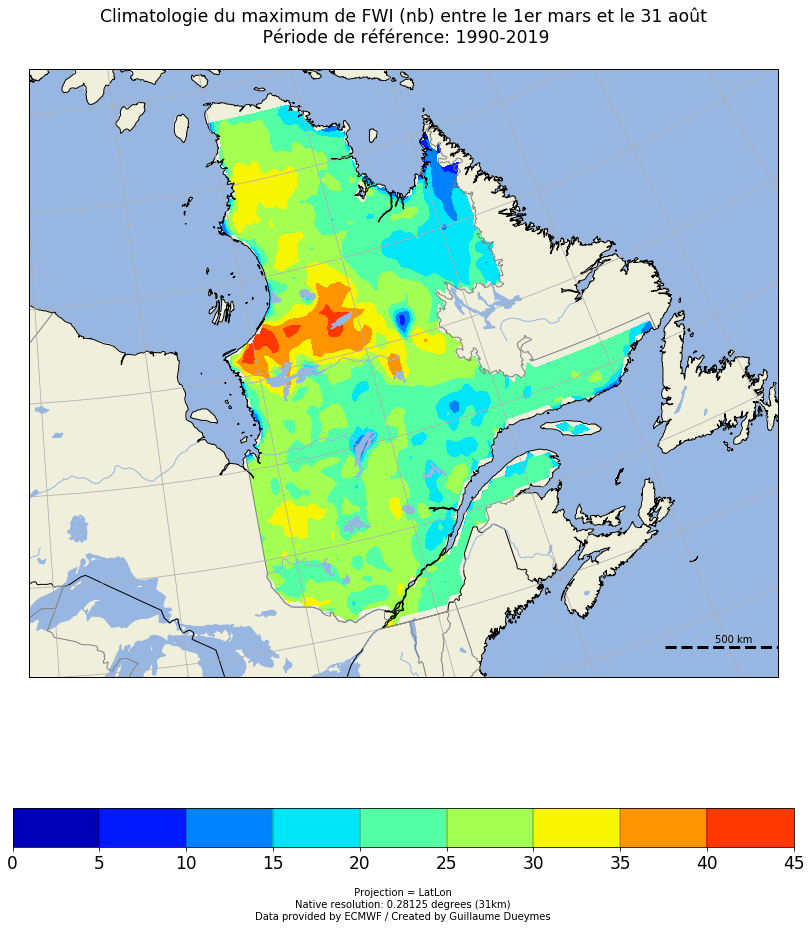

In [8]:
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
from carto import scale_bar

cmap0=plt.cm.jet
cmap0.set_under('darkblue') 
cmap0.set_over('darkred')

fig=plt.figure(figsize=(28,16), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-90,-55,45,60])
 #ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))      # couche ocean
ax.add_feature(cfeature.LAND.with_scale('50m'))       # couche land
ax.add_feature(cfeature.LAKES.with_scale('50m'))      # couche lac
   
ax.add_feature(cfeature.BORDERS.with_scale('50m'))    # couche frontieres
ax.add_feature(cfeature.RIVERS.with_scale('50m'))     # couche rivières 
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',     # ajout de la couche cotière 
                            facecolor='none', name='coastline')
ax.add_feature(coast, edgecolor='black')    
states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='10m',
            facecolor='none')
    
ax.add_feature(states_provinces, edgecolor='gray') 

mm = ax.contourf(lons,\
                   lats,\
                   fwi_clim_90_2019,\
                   vmin=0,\
                   vmax=50, \
                   transform=ccrs.PlateCarree(),\
                   levels=np.arange(0, 50, 5.),\
                   cmap=cmap0 )
ax.gridlines()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-150.0,-40.0,20)
yticks =np.arange(10,80,10)

# Standard 6,000 km scale bar.
scale_bar(ax, (0.85, 0.05), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

cbar = plt.colorbar(mm, orientation='horizontal', shrink=0.5, drawedges='True', ticks=np.arange(0, 50.1, 5),extend='both')
cbar.set_label(u'\n Projection = LatLon \nNative resolution: 0.28125 degrees (31km)\nData provided by ECMWF / Created by Guillaume Dueymes', size='medium') # Affichage de la légende de la barre de couleur
cbar.ax.tick_params(labelsize=17) 
 
plt.xlabel(u'\nTemperature / Température (°C)',size='x-large')
string_title=u'Climatologie du maximum de FWI (nb) entre le 1er mars et le 31 août\n Période de référence: 1990-2019\n'
plt.title(string_title, size='xx-large')
plt.savefig('K:/PROJETS/PROJET_FIRE_INDEX/figures/ERA5_max_FWI_With_Onset_CLIM_1990-2019.png', bbox_inches='tight', pad_inches=0.1)
plt.show() 


### SR climatology

In [9]:
file = 'K:/PROJETS/PROJET_FIRE_INDEX/ERA5_SR_Netcdf/ERA5_SR_QC_SNOW_New_'
multi_file = [f'{file}{year}_from_3_to_8.nc' for year in range(1990,2020,1)]
sr_dataset = xr.open_mfdataset(multi_file)
sr_dataset

<xarray.Dataset>
Dimensions:  (lat: 77, lon: 121, time: 5520)
Coordinates:
  * lon      (lon) float64 -84.0 -83.75 -83.5 -83.25 ... -54.5 -54.25 -54.0
  * lat      (lat) float32 62.0 61.75 61.5 61.25 61.0 ... 43.75 43.5 43.25 43.0
  * time     (time) datetime64[ns] 1990-03-01 1990-03-02 ... 2019-08-31
Data variables:
    SR       (time, lat, lon) float64 dask.array<chunksize=(184, 77, 121), meta=np.ndarray>

In [10]:
array_year = sr_dataset.groupby('time.year').sum('time')
array_year.to_netcdf('./Netcdf/SR_ERA5_Year_1990-2019.nc') 

In [11]:
nc_fid=Dataset('./Netcdf/SR_ERA5_Year_1990-2019.nc','r')
data=nc_fid.variables['SR'][:].squeeze()
lons=nc_fid.variables['lon'][:].squeeze()
lats=nc_fid.variables['lat'][:].squeeze()
data.shape

(30, 77, 121)

In [12]:
sr_clim_90_2019 = data.mean(axis=0)

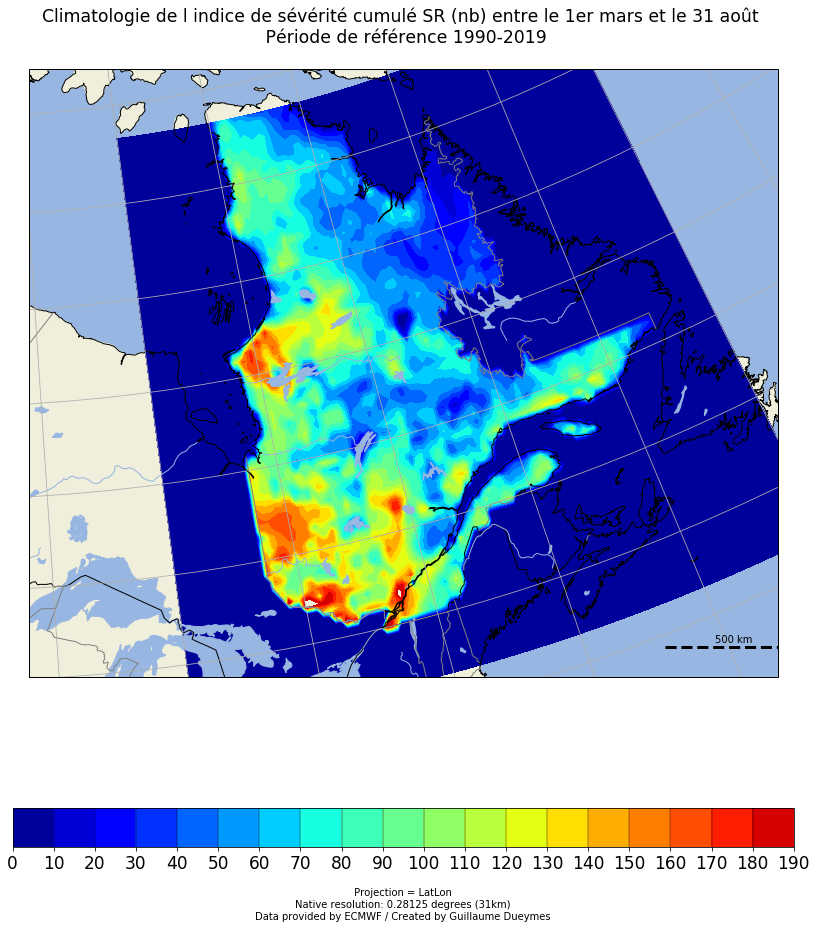

In [13]:
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
from carto import scale_bar

cmap0=plt.cm.jet
cmap0.set_under('darkblue') 
cmap0.set_over('darkred')

fig=plt.figure(figsize=(28,16), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-90,-55,45,60])
 #ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))      # couche ocean
ax.add_feature(cfeature.LAND.with_scale('50m'))       # couche land
ax.add_feature(cfeature.LAKES.with_scale('50m'))      # couche lac
   
ax.add_feature(cfeature.BORDERS.with_scale('50m'))    # couche frontieres
ax.add_feature(cfeature.RIVERS.with_scale('50m'))     # couche rivières 
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',     # ajout de la couche cotière 
                            facecolor='none', name='coastline')
ax.add_feature(coast, edgecolor='black')    
states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='10m',
            facecolor='none')
    
ax.add_feature(states_provinces, edgecolor='gray') 

mm = ax.contourf(lons,\
                   lats,\
                   sr_clim_90_2019,\
                   vmin=0,\
                   vmax=200, \
                   transform=ccrs.PlateCarree(),\
                   levels=np.arange(0, 200, 10.),\
                   cmap=cmap0 )
ax.gridlines()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-150.0,-40.0,20)
yticks =np.arange(10,80,10)

# Standard 6,000 km scale bar.
scale_bar(ax, (0.85, 0.05), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

cbar = plt.colorbar(mm, orientation='horizontal', shrink=0.5, drawedges='True', ticks=np.arange(0, 200.1, 10),extend='both')
cbar.set_label(u'\n Projection = LatLon \nNative resolution: 0.28125 degrees (31km)\nData provided by ECMWF / Created by Guillaume Dueymes', size='medium') # Affichage de la légende de la barre de couleur
cbar.ax.tick_params(labelsize=17)
 
string_title=u'Climatologie de l indice de sévérité cumulé SR (nb) entre le 1er mars et le 31 août \n Période de référence 1990-2019\n'
plt.title(string_title, size='xx-large')
plt.savefig('K:/PROJETS/PROJET_FIRE_INDEX/figures/ERA5_Cumulate_SR_With_Onset_CLIM_1990-2019.png', bbox_inches='tight', pad_inches=0.1)
plt.show() 

### Onset climatology

In [21]:
file = 'K:/PROJETS/PROJET_FIRE_INDEX/ERA5_Onset_Netcdf/ERA5_SNOW_Onset_'
#multi_file = [f'{file}{year}_from_3_to_8.nc' for year in range(1990,2020,1)]
multi_file = [f'{file}{year}_from_3_to_8.nc' for year in range(1990,2020,1)]

In [22]:
ds = xr.concat([xr.open_dataset(f) for f in multi_file], 'time')

In [23]:
ds

<xarray.Dataset>
Dimensions:  (lat: 77, lon: 121, time: 30)
Coordinates:
  * lon      (lon) float64 -84.0 -83.75 -83.5 -83.25 ... -54.5 -54.25 -54.0
  * lat      (lat) float32 62.0 61.75 61.5 61.25 61.0 ... 43.75 43.5 43.25 43.0
Dimensions without coordinates: time
Data variables:
    Onset    (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [24]:
data=ds.variables['Onset'][:].squeeze()
lons=ds.variables['lon'][:].squeeze()
lats=ds.variables['lat'][:].squeeze()

In [25]:
onset_clim_90_2019 = data.mean(axis=0)

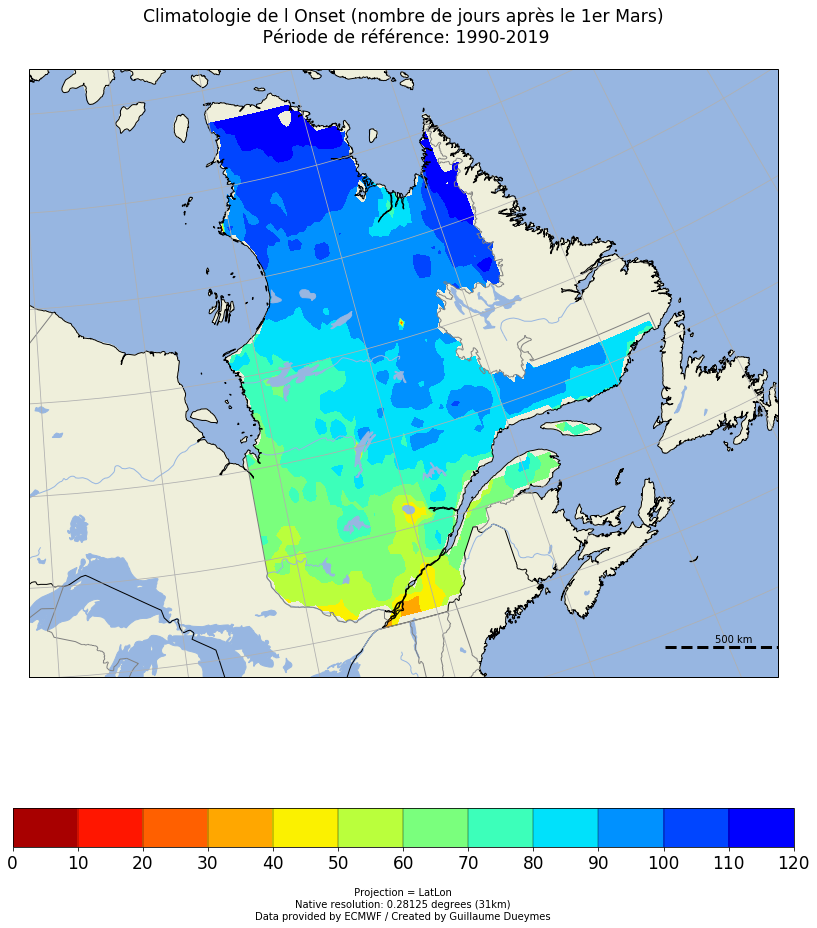

In [28]:
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib as mpl
from carto import scale_bar

cmap0=plt.cm.jet_r
cmap0.set_under('darkred') 
cmap0.set_over('darkblue') 

fig=plt.figure(figsize=(28,16), frameon=True)  
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-90,-55,45,60])
 #ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))      # couche ocean
ax.add_feature(cfeature.LAND.with_scale('50m'))       # couche land
ax.add_feature(cfeature.LAKES.with_scale('50m'))      # couche lac
   
ax.add_feature(cfeature.BORDERS.with_scale('50m'))    # couche frontieres
ax.add_feature(cfeature.RIVERS.with_scale('50m'))     # couche rivières 
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',     # ajout de la couche cotière 
                            facecolor='none', name='coastline')
ax.add_feature(coast, edgecolor='black')    
states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='10m',
            facecolor='none')
    
ax.add_feature(states_provinces, edgecolor='gray') 

mm = ax.contourf(lons,\
                   lats,\
                   onset_clim_90_2019,\
                   vmin=0,\
                   vmax=130, \
                   transform=ccrs.PlateCarree(),\
                   levels=np.arange(0, 130, 10.),\
                   cmap=cmap0 )
ax.gridlines()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-150.0,-40.0,20)
yticks =np.arange(10,80,10)

# Standard 6,000 km scale bar.
scale_bar(ax, (0.85, 0.05), 500 ,plot_kwargs = dict(linestyle='dashed', color='black'))

cbar = plt.colorbar(mm, orientation='horizontal', shrink=0.5, drawedges='True', ticks=np.arange(0, 130.1, 10),extend='both')
cbar.set_label(u'\n Projection = LatLon \nNative resolution: 0.28125 degrees (31km)\nData provided by ECMWF / Created by Guillaume Dueymes', size='medium') # Affichage de la légende de la barre de couleur
cbar.ax.tick_params(labelsize=17)

#string_title=u'Climate normals of Onset (number of days from March 1st)\n reference period 1990-2019\n'
string_title=u'Climatologie de l Onset (nombre de jours après le 1er Mars)\n Période de référence: 1990-2019\n'
plt.title(string_title, size='xx-large')
plt.savefig('K:/PROJETS/PROJET_FIRE_INDEX/figures/ERA5_Onset_CLIM_Mars_Aout_1990-2019.png', bbox_inches='tight', pad_inches=0.1)
plt.show() 